In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [54]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2], 1, train_images.shape[3])
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2], 1, test_images.shape[3])

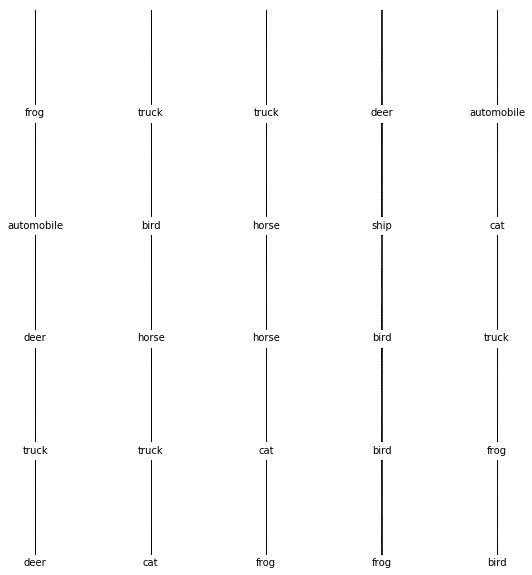

In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [55]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

model = models.Sequential()
model.add(layers.Conv2D(32, (9, 1), activation='relu', input_shape=(1024, 1, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (9, 1), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (9, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [56]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 1016, 32)          896       
_________________________________________________________________
flatten_10 (Flatten)         (None, 32512)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2080832   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 2,082,378
Trainable params: 2,082,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 44s 882us/sample - loss: 1.7697 - acc: 0.3531 - val_loss: 1.5268 - val_acc: 0.4521
Epoch 2/10
50000/50000 [==============================] - 43s 863us/sample - loss: 1.4586 - acc: 0.4793 - val_loss: 1.4613 - val_acc: 0.4753
Epoch 3/10
50000/50000 [==============================] - 45s 904us/sample - loss: 1.3649 - acc: 0.5132 - val_loss: 1.3806 - val_acc: 0.5073
Epoch 4/10
50000/50000 [==============================] - 47s 933us/sample - loss: 1.2838 - acc: 0.5415 - val_loss: 1.3738 - val_acc: 0.5117
Epoch 5/10
 4736/50000 [=>............................] - ETA: 34s - loss: 1.1903 - acc: 0.5731 ETA: 33

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)